In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("athlete_data.csv")

In [3]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
data.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
print(data.info(),data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None                    ID                  Name     Sex            Age  \
count   271116.000000                271116  271116  261642.000000   
unique            NaN             

<Axes: >

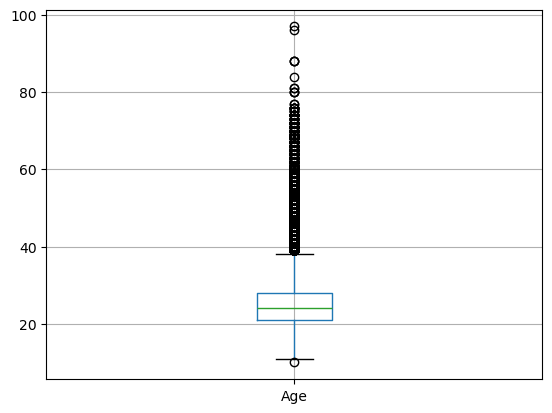

In [6]:
data.boxplot(column="Age")

In [7]:
data["Age"].fillna(data['Age'].median(),inplace=True)

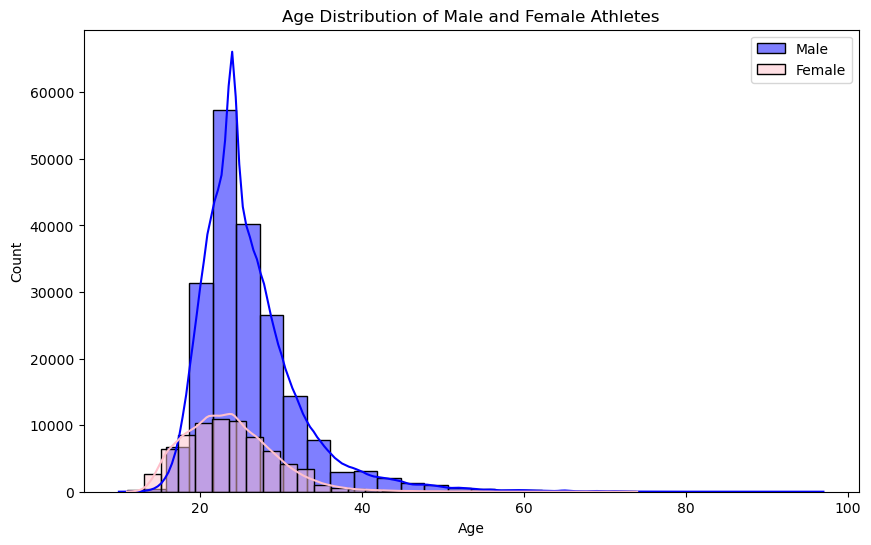

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Sex'] == 'M']['Age'], bins=30, kde=True, color='blue', label='Male', stat='count', common_norm=False)
sns.histplot(data[data['Sex'] == 'F']['Age'], bins=30, kde=True, color='pink', label='Female', stat='count', common_norm=False)
plt.title('Age Distribution of Male and Female Athletes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show();

<h3>The age distribution of male and female athletes shows that most athletes are between 15 and 30 years old, with a sharp decline in participation after 30. Male athletes outnumber females across all age groups, peaking around 20-25 years. Both genders follow a similar distribution pattern, with males having a higher overall count.</h3>

In [10]:
total_athletes = data['ID'].nunique()
print(f"Total Number oF Atheletes over the Duration of 1896 - 2016: {total_athletes}")

Total Number oF Atheletes over the Duration of 1896 - 2016: 135571


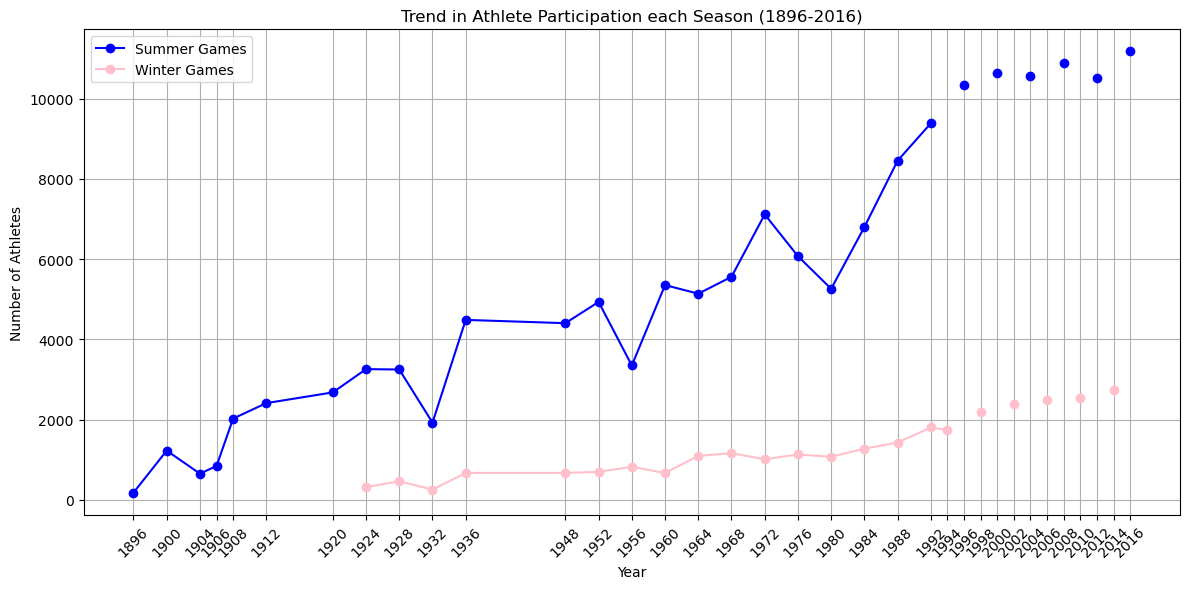

In [207]:
participation_trend = data.groupby(['Year', 'Season'])['ID'].nunique().reset_index()
pivot_data = participation_trend.pivot(index='Year', columns='Season', values='ID')
plt.figure(figsize=(12, 6))
plt.plot(pivot_data.index, pivot_data['Summer'], marker='o', label='Summer Games', color='blue')
plt.plot(pivot_data.index, pivot_data['Winter'], marker='o', label='Winter Games', color='pink')
plt.title('Trend in Athlete Participation each Season (1896-2016)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(pivot_data.index, pivot_data.index, rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

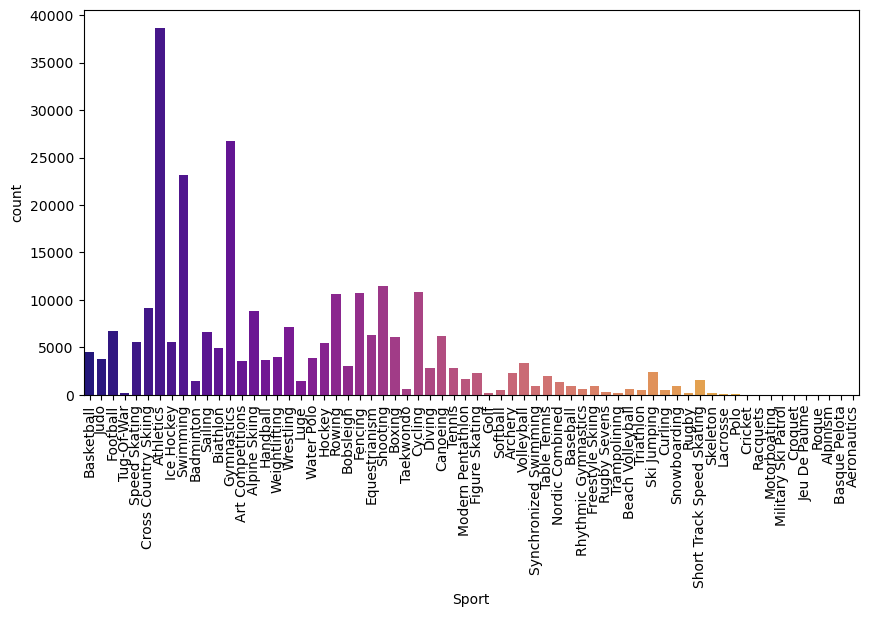

In [49]:
plt.figure(figsize=(10,5)) 
sns.countplot(x='Sport',data=data,palette="plasma")
plt.xticks(rotation=90);
plt.show()

<h3>The bar chart shows the distribution of count of participants across various sports on specific activities. 
Key insights include:
Basketball has the highest count by far, reaching nearly 40,000.
Other high-count sports include Athletics, Football (Soccer), and Ice Hockey.
Swimming, Boxing, and Gymnastics also feature prominently with considerable counts.
Sports like Archery, Lacrosse, and Canoeing have much lower counts.
The chart transitions from more popular sports on the left to less common ones on the right, with a smooth gradient of participation or popularity declining from left to right.</h3>

In [291]:
country_participation = data.groupby('NOC',sort=True)['Year'].nunique().reset_index().head(10)
country_participation.columns = ['NOC', 'Number of Games Participated']
print(country_participation)

   NOC  Number of Games Participated
0  AFG                            14
1  AHO                            13
2  ALB                            11
3  ALG                            15
4  AND                            17
5  ANG                             9
6  ANT                            10
7  ANZ                             2
8  ARG                            31
9  ARM                            12


In [289]:
total_games = data['Year'].nunique()
print(f'Total number of Olympic Games: {total_games}')
country_game_participation = data.groupby(['Year', 'Team'])['ID'].nunique().reset_index()
country_game_participation.columns = ['Year', 'Team', 'Number of Athletes']
country_game_participation_sorted = country_game_participation.sort_values(by='Number of Athletes', ascending=False)
print(country_game_participation_sorted.to_string(index=False))

Total number of Olympic Games: 35
 Year                                            Team  Number of Athletes
 1992                                   United States                 662
 1996                                   United States                 636
 1988                                   United States                 621
 2000                                       Australia                 603
 1984                                   United States                 603
 2008                                           China                 581
 1992                                    Unified Team                 578
 2008                                   United States                 576
 2000                                   United States                 575
 1980                                    Soviet Union                 560
 1988                                    Soviet Union                 556
 1908                                   Great Britain                 551
 199

<h3>It tells us the maximum number of atheletes participated by a country as per year </h3>

<h3>Number of Atheletes by sports</h3>

In [139]:
sports_participation = data.groupby('Sport')['ID'].nunique().reset_index().head(10)
sports_participation.columns = ['Sport', 'Number of Athletes']
sports_participation_sorted = sports_participation.sort_values(by='Number of Athletes', ascending=False)
print(sports_participation_sorted.to_string(index=False))  

           Sport  Number of Athletes
       Athletics               22071
      Basketball                3413
   Alpine Skiing                2735
Art Competitions                1814
         Archery                1113
       Badminton                 811
        Baseball                 761
        Alpinism                  25
   Basque Pelota                   2
     Aeronautics                   1


In [269]:
medal_counts = data[data['Medal'].isin(['Gold', 'Silver', 'Bronze'])].groupby('Medal')['ID'].nunique().reset_index()
medal_counts.columns = ['Medal Type', 'Number of Athletes']
print(medal_counts)

  Medal Type  Number of Athletes
0     Bronze               11879
1       Gold               10425
2     Silver               11441


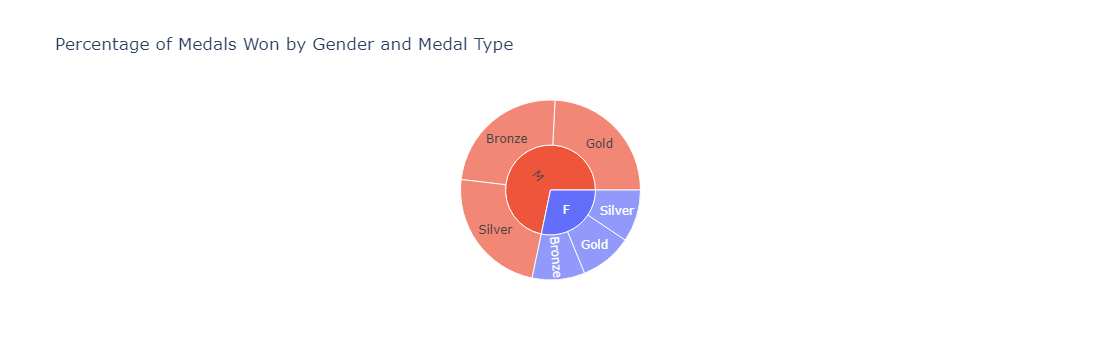

In [243]:
medal_data = data[data['Medal'].notna()]
fig = px.sunburst(
    medal_data,
    path=['Sex', 'Medal'],         
    color='Sex',            
    title="Percentage of Medals Won by Gender and Medal Type"
)
fig.show()

<h3>This chart shows the percentage breakdown of medals won by gender and type (Gold, Silver, Bronze). There is a representation between M (Men) and F (Women), with each category subdivided into medal types.</h3>

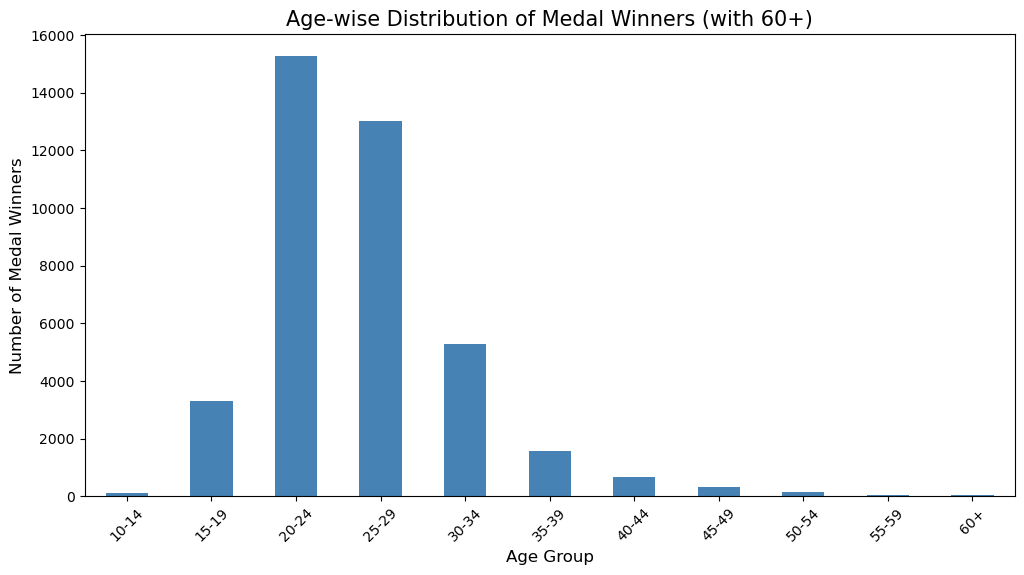

In [239]:
age_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 100]  
age_labels = ['10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', 
              '45-49', '50-54', '55-59', '60+']

medal_data['Age Group'] = pd.cut(medal_data['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = medal_data['Age Group'].value_counts(sort=False)

plt.figure(figsize=(12, 6))
age_group_counts.plot(kind='bar', color='steelblue')

plt.title("Age-wise Distribution of Medal Winners (with 60+)", fontsize=15)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Medal Winners", fontsize=12)

plt.xticks(rotation=45)
plt.show()

<h3>The chart highlights the distribution of medal winners by age group. The largest number of winners are in the 20-24 age group, followed closely by 25-29. Younger and older age groups (like 10-14 and 60+) have significantly fewer winners.</h3>

<Figure size 1200x600 with 0 Axes>

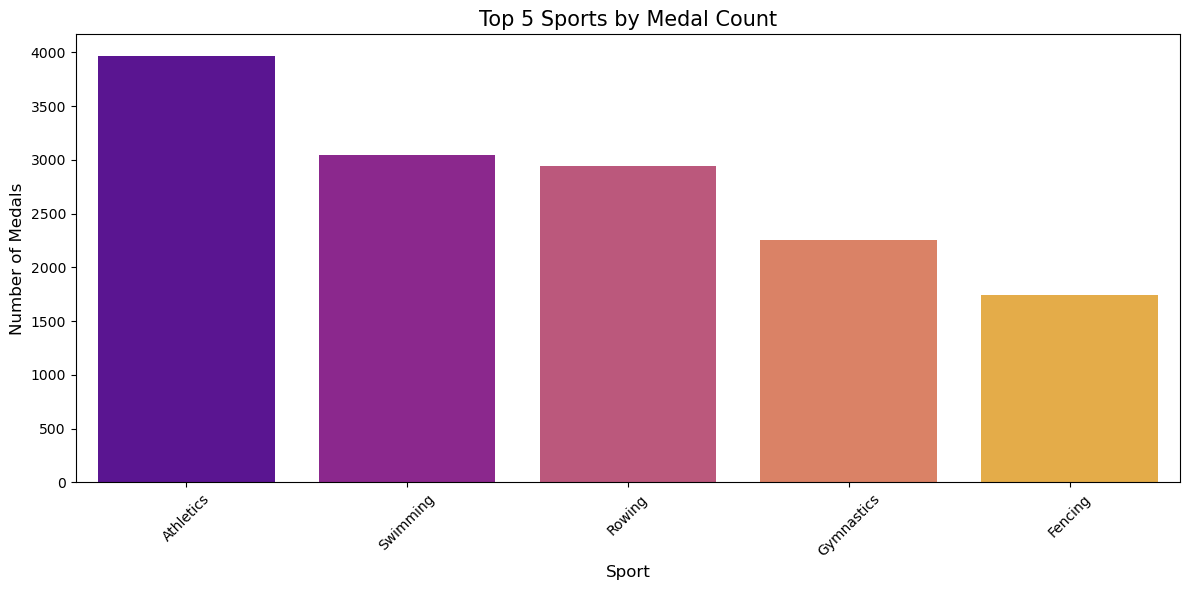

In [280]:
top_sports = medal_data['Sport'].value_counts().nlargest(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sports.index, y=top_sports.values, palette="plasma")
plt.title("Top 5 Sports by Medal Count", fontsize=15)
plt.xlabel("Sport", fontsize=12)
plt.ylabel("Number of Medals", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [135]:
report_data = []

youngest_male_participant = data[data['Sex'] == 'M'].nsmallest(1, 'Age')
youngest_female_participant = data[data['Sex'] == 'F'].nsmallest(1, 'Age')

oldest_male_participant = data[data['Sex'] == 'M'].nlargest(1, 'Age')
oldest_female_participant = data[data['Sex'] == 'F'].nlargest(1, 'Age')

youngest_male_medalist = data[(data['Sex'] == 'M') & (data['Medal'].notna())].nsmallest(1, 'Age')
youngest_female_medalist = data[(data['Sex'] == 'F') & (data['Medal'].notna())].nsmallest(1, 'Age')

oldest_male_medalist = data[(data['Sex'] == 'M') & (data['Medal'].notna())].nlargest(1, 'Age')
oldest_female_medalist = data[(data['Sex'] == 'F') & (data['Medal'].notna())].nlargest(1, 'Age')

report_data.append({'Category': 'Youngest Participant', 'Gender': 'Male', 'Age': youngest_male_participant['Age'].values[0], 'Name': youngest_male_participant['Name'].values[0]})
report_data.append({'Category': 'Youngest Participant', 'Gender': 'Female', 'Age': youngest_female_participant['Age'].values[0], 'Name': youngest_female_participant['Name'].values[0]})
report_data.append({'Category': 'Oldest Participant', 'Gender': 'Male', 'Age': oldest_male_participant['Age'].values[0], 'Name': oldest_male_participant['Name'].values[0]})
report_data.append({'Category': 'Oldest Participant', 'Gender': 'Female', 'Age': oldest_female_participant['Age'].values[0], 'Name': oldest_female_participant['Name'].values[0]})

report = pd.DataFrame(report_data)

print(report)

               Category  Gender   Age                                    Name
0  Youngest Participant    Male  10.0                      Dimitrios Loundras
1  Youngest Participant  Female  11.0              Magdalena Cecilia Colledge
2    Oldest Participant    Male  97.0                  John Quincy Adams Ward
3    Oldest Participant  Female  74.0  Ernestine Lonie Ernesta Robert-Mrignac


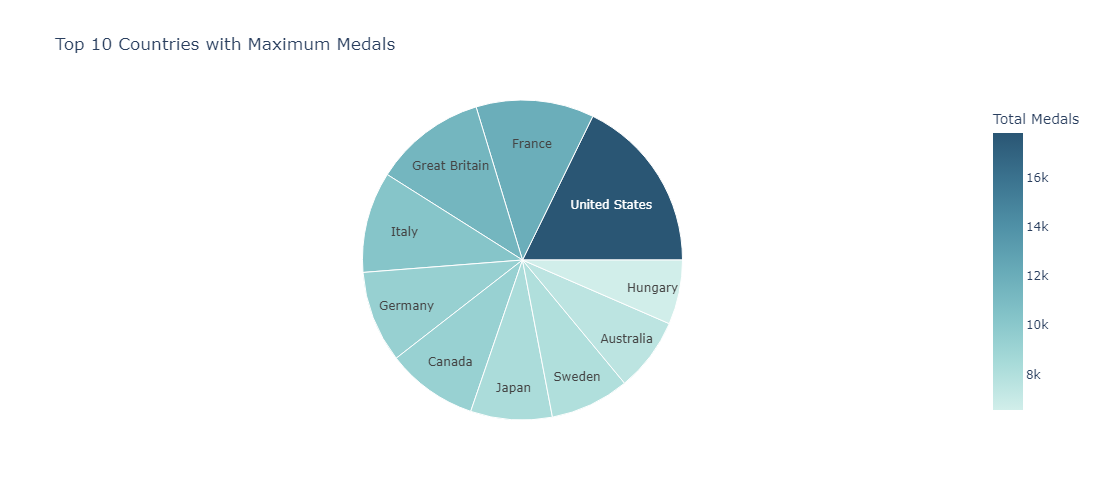

In [233]:
import pandas as pd
import plotly.express as px

country_medal_counts = data['Team'].value_counts().reset_index()
country_medal_counts.columns = ['Country', 'Total Medals']

top_ten_countries = country_medal_counts.nlargest(10, 'Total Medals')

fig = px.sunburst(top_ten_countries, path=['Country'], values='Total Medals',
                  title='Top 10 Countries with Maximum Medals',
                  color='Total Medals', color_continuous_scale='teal',
                  width=1000,  
                  height=500 )
fig.show()

<h3>Top 10 Countries with Maximum Medals (Pie Chart):

The United States holds the largest portion of total medals, followed by countries like France, Great Britain, Germany, and Italy. The total number of medals is represented with a gradient, where the U.S. holds around 16,000 medals, and other countries follow.</h3>

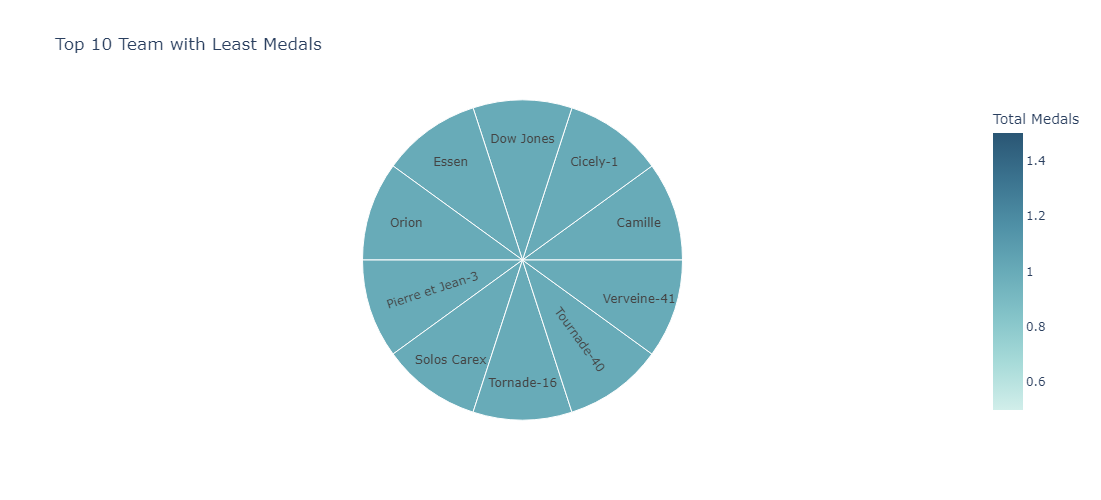

In [235]:
import pandas as pd
import plotly.express as px

country_medal_counts = data['Team'].value_counts().reset_index()
country_medal_counts.columns = ['Team', 'Total Medals']

top_ten_countries = country_medal_counts.nsmallest(10, 'Total Medals')

fig = px.sunburst(top_ten_countries, path=['Team'], values='Total Medals',
                  title='Top 10 Team with Least Medals',
                  color='Total Medals', color_continuous_scale='teal',
                  width=1000,  
                  height=500 )
fig.show()

<h3>Top 10 Teams with Least Medals (Pie Chart):

The chart displays the top 10 teams that have won the fewest medals, with values ranging between 0.6 and 1.4. Teams such as Dow Jones, Cicely-1, Camille, and Verveine-41 are part of this group</h3>